# Project Python Foundations: FoodHub Data Analysis by Enoch Adogla

**Marks: 40**

### Context


The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings                     #suppressing warnings
warnings.filterwarnings('ignore')

In [3]:
### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [5]:
# write your code here
df.shape



(1898, 9)

#### Observations:
The data has 1898 rows and 9 columns


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [6]:
# use info() to print a concise summary of the DataFrame
df.info()  # Finding column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The order_id and customer_id  are integers identifying order and customer repectively. The restarurant name and cuising are 
are objects or strings. The food preparation time and delivery time are the numerical values for studies


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and writeyour observations on the same. (0.5 mark)


In [7]:
cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']  # Isolating the object types
df[cols] = df[cols].astype('category')                         # Converting the objects into a catogory
df.info()                                                      # printing out information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations: 'restauran_name', 'cuisine_type' and 'day_of_the_week' have been converted from strings to category types. 


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [8]:
# write your code here
pd.set_option('display.float_format', lambda x: '%4f' % x) # Convrting exponents in floats
df.describe().copy()  # Finding summary statistics

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1477495.500000,171168.478398,16.498851,27.371970,24.161749
std,548.049724,113698.139743,7.483812,4.632481,4.972637
min,1476547.000000,1311.000000,4.470000,20.000000,15.000000
25%,1477021.250000,77787.750000,12.080000,23.000000,20.000000
50%,1477495.500000,128600.000000,14.140000,27.000000,25.000000
75%,1477969.750000,270525.000000,22.297500,31.000000,28.000000
max,1478444.000000,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The average cost order for the 1898 orders is  16.50 dollars, with a standard deviation of 7.48. The median is  14.14 dollars. The minimum order is 4.47 dollars while the maxium order is 35.41.

The average food preparation time is 27.3 minutes, with a standard deviation of 4.6.The median is is 27.0 minutes. The minimum time for food preparation is 20 minutes and the maximum is 35 minutes

The average delivery time is 24.14 minutes, with a standard deviation of 4.9. The median is 25 minutes. The minimum is 15 minutes and maximum is 33 minutes.


### **Question 5:** How many orders are not rated? (0.5 mark)


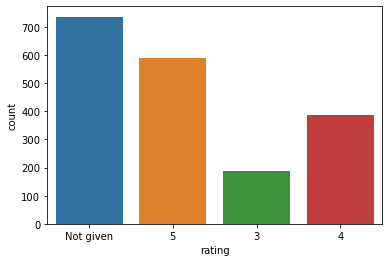

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
sns.countplot(df['rating']);
plt.show()
df['rating'].value_counts()


In [10]:
y = df['rating']== 'Not given'
y.value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### Observations:


736 orders are not rated

In [11]:
### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

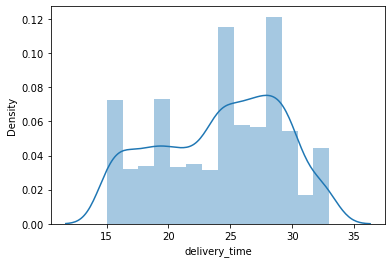

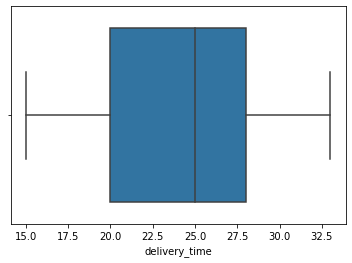

In [12]:
sns.distplot(df['delivery_time'],);
plt.show()
sns.boxplot(df['delivery_time']); #, hue = 'day_of_the_week');
plt.show()
sns.set(rc={'figure.figsize':(6,4)})


The delivery time ranges from 15 to 24 minutes. 

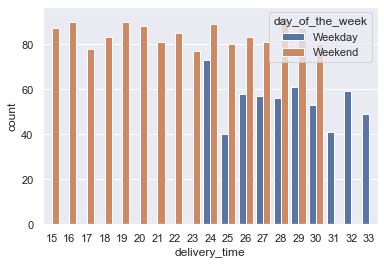

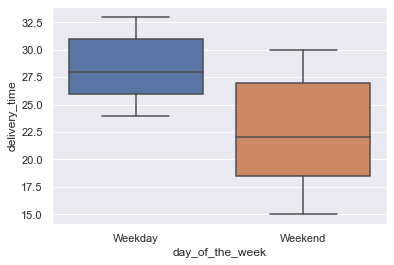

In [13]:
sns.countplot(df['delivery_time'], hue = df['day_of_the_week']); #, hue = 'day_of_the_week');
plt.show()
sns.boxplot(x = 'day_of_the_week',y = 'delivery_time',  data = df); #, hue = 'day_of_the_week');
plt.show()
sns.set(rc={'figure.figsize':(6,4)})

Weekend orders have the shortes delivery time, between 15 and 30 minutes. The median delivery time on weekend is about 24 minutes

The weekday orders have a longer delivery time between about 24 minutes and 33 minutes. The median delivery time on weekday is about 28 minutes.

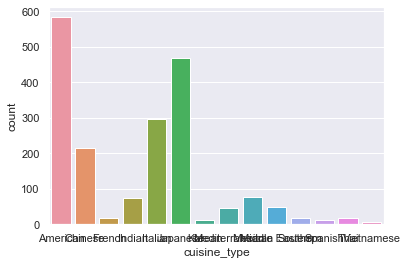

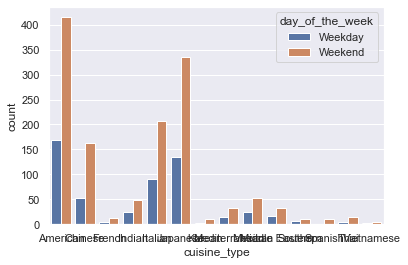

In [14]:
sns.countplot(data = df, x = 'cuisine_type');
plt.show()
sns.countplot(df['cuisine_type'], hue = df['day_of_the_week']);
sns.set(rc={'figure.figsize':(16,4)})
plt.show()


The cuisine_type, American is the most ordered cuisine on weekends and weekdays. 

All restaurants see more orders on weekends than weekdays

While American cuisine remain the favorite on weekends or weekdays, the orders for Japanese cuisine and Italian cuisines on weekends exceed ordeers for American cusine on weekdays.
There are almost as much Chinese cuisine orders on weekends as American cuisine orders on weekdays.


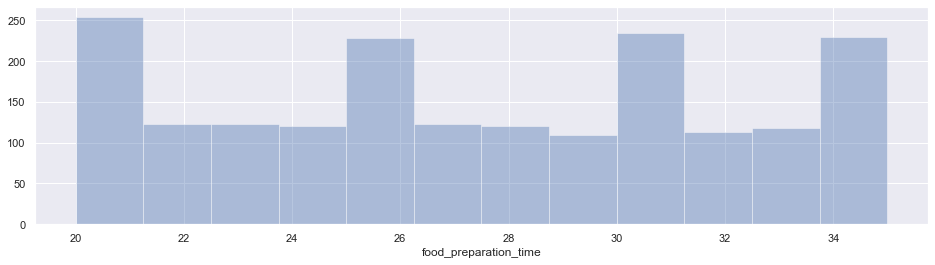

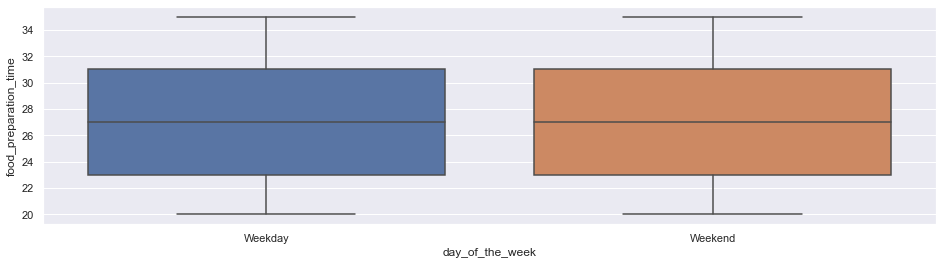

In [15]:
sns.distplot(df['food_preparation_time'], kde = False);
plt.show()
sns.boxplot(x = 'day_of_the_week', y= 'food_preparation_time', data = df)
plt.show()
sns.set(rc={'figure.figsize':(8,4)})


Food preparation time varies from 20 to 34 miuntes, with a median of about 26 to 28 minutes.
There is not difference between food preparation time on weekdays and weekends



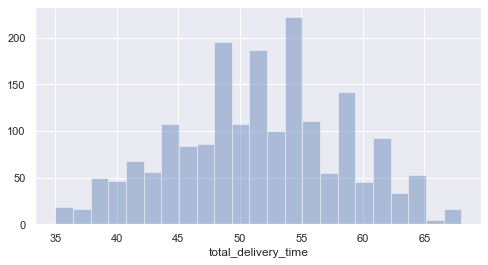

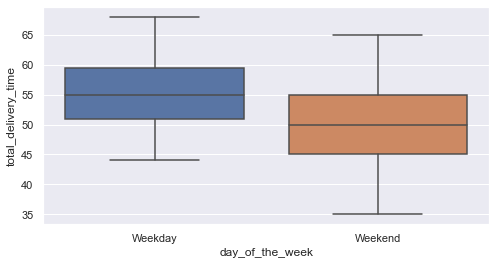

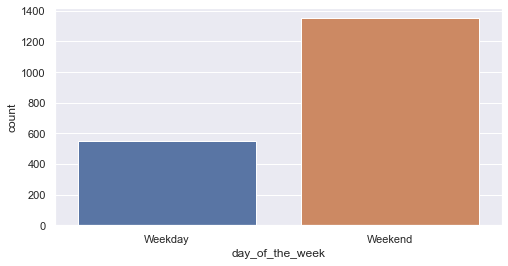

In [16]:
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time'] #Computing total delivery time from food_preparation_time and delivery_time
sns.distplot(df['total_delivery_time'], kde = False);      
plt.show()
sns.boxplot(x = 'day_of_the_week', y ='total_delivery_time', data = df);
plt.show()
sns.countplot(df['day_of_the_week']),
plt.show()
sns.set(rc={'figure.figsize':(8,4)})
#sns.countplot(df['total_delivery_time'], hue = df['day_of_the_week']);

There are more than twice as much orders on weekends as weekdays. 

The overal total delivery on time on weekends: from food preparation to delivery, is much lower on weekend.
This is due to the delivery time being shorter on weekends.

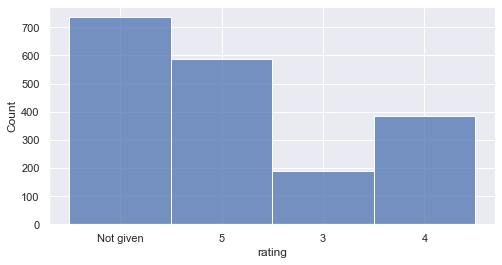

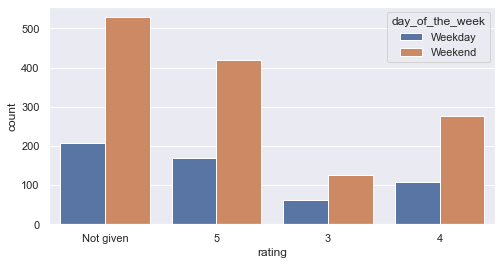

In [17]:
sns.histplot(df['rating'])       # histplot of the different ratings
plt.show()
sns.countplot(df['rating'], hue = df['day_of_the_week']); # Boxpot of the ratings
plt.show()

The ratings total number of rating counts for the restaurants on both weekday and weekends are as follows:

Not given:736; rating 5:588; rating 4: 386; rating 3 :188


### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

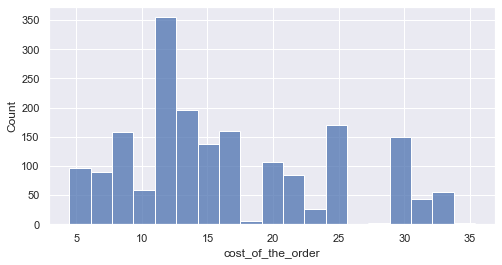

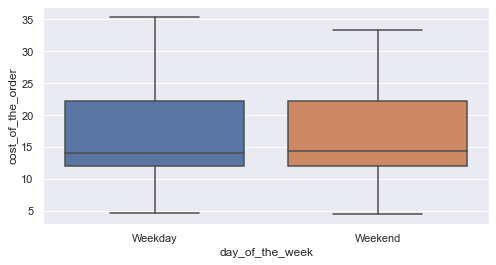

In [18]:
sns.histplot(df['cost_of_the_order'])       # histplot of the different ratings
plt.show()
sns.boxplot(y ='cost_of_the_order', x= 'day_of_the_week', data = df); # Boxpot of the ratings
plt.show()

No difference in the cost of food between weekdays and weekends. The cost of food is slightly skeed toward a higher purchases

In [19]:
# write the code here
df['restaurant_name'].value_counts().head() #Finding top 5 restaurants


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top five restaurants with the highest number of orders are as follows:

Top 5 restaurant by order are:        

Shake Shack:                        219

The Meatball Shop:                  132

Blue Ribbon Sushi:                  119

Blue Ribbon Fried Chicken:          96

Parm:                               68



### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [20]:
# write the code here
x = df[['cuisine_type', 'day_of_the_week']]   # extracting columns: cusine_type and day_of_the_week
y= x.groupby("day_of_the_week")               #grouping by day_of_the_week       
y.get_group('Weekend').value_counts()                 #Finding the most popular cuisine on weekends

 

cuisine_type    day_of_the_week
American        Weekend            415
Japanese        Weekend            335
Italian         Weekend            207
Chinese         Weekend            163
Mexican         Weekend             53
Indian          Weekend             49
Mediterranean   Weekend             32
Middle Eastern  Weekend             32
Thai            Weekend             15
French          Weekend             13
Korean          Weekend             11
Southern        Weekend             11
Spanish         Weekend             11
Vietnamese      Weekend              4
dtype: int64

In [21]:
a = df[df['day_of_the_week']=='Weekend']
a['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [22]:
for day_of_the_week, day_of_the_week_x in y:
    print(day_of_the_week)
    print(day_of_the_week_x)

Weekday
       cuisine_type day_of_the_week
2           Mexican         Weekday
4          American         Weekday
5            Indian         Weekday
7     Mediterranean         Weekday
8            Indian         Weekday
...             ...             ...
1878       Japanese         Weekday
1885       American         Weekday
1889        Chinese         Weekday
1895       Japanese         Weekday
1896  Mediterranean         Weekday

[547 rows x 2 columns]
Weekend
     cuisine_type day_of_the_week
0          Korean         Weekend
1        Japanese         Weekend
3        American         Weekend
6         Italian         Weekend
11        Mexican         Weekend
...           ...             ...
1891     American         Weekend
1892      Chinese         Weekend
1893      Mexican         Weekend
1894     American         Weekend
1897     Japanese         Weekend

[1351 rows x 2 columns]


In [23]:
y.get_group('Weekend').describe()

,cuisine_type,day_of_the_week
count,1351,1351
unique,14,1
top,American,Weekend
freq,415,1351


#### Observations:
The most popular restaurant on weekends is American. 

It's frequented 415 on weekends out of a total of 1351 weekend visits to restaurants in the Food Hub survey


### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [24]:
# write the code here
x = df['cost_of_the_order']>20    
orders_above_twenty = x.sum()    #Boolean code for number of total order above 20 dollars  
percentage=x.value_counts(normalize = True)*100  #Finding percent of orders True for cost above 20 dollars

print(orders_above_twenty)
percentage


  



555


False   70.758693
True    29.241307
Name: cost_of_the_order, dtype: float64

#### Observations:
The number of total orders where cost is above $20 is 555, representing 70.76% of all orders


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [25]:
# write the code here
df['delivery_time'].mean()   #Calculating the mean delivery time


24.161749209694417

#### Observations: The average delivery time is 24.


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [26]:
df[df.cost_of_the_order == df.cost_of_the_order.max()]      # Finding ID and details of the highest amount spent on a  single order.


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
573,1477814,62359,Pylos,Mediterranean,35.410000,Weekday,4,21,29,50


#### Observations:
The customer who spent a single amount on  a single order spent $35.4. She ordered a Meditterranean cuisine type from Pylos restaurant. The order ID is 1477814 and the Customer ID is 62359

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [27]:
df1 = df.loc[:,['day_of_the_week','cost_of_the_order', 'food_preparation_time','delivery_time']]
df1

,day_of_the_week,cost_of_the_order,food_preparation_time,delivery_time
0,Weekend,30.750000,25,20
1,Weekend,12.080000,25,23
2,Weekday,12.230000,23,28
3,Weekend,29.200000,25,15
4,Weekday,11.590000,25,24
...,...,...,...,...
1893,Weekend,22.310000,31,17
1894,Weekend,12.180000,31,19
1895,Weekday,25.220000,31,24
1896,Weekday,12.180000,23,31


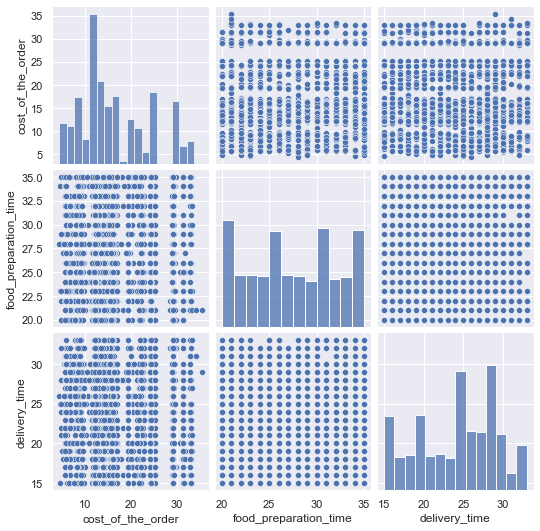

In [28]:
sns.pairplot(df1);

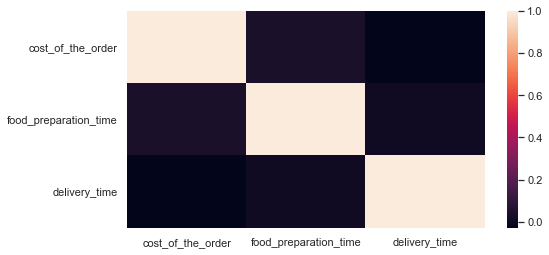

In [29]:
sns.heatmap(df1.corr())
sns.set(rc={'figure.figsize':(8,4)})

There is no correlation between:

cost of food and delivery time 

food preparation time and delivery

food preparation time and cost of food

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [34]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [35]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'].cat.remove_unused_categories())['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [40]:
# add a new column to the dataframe df that stores the company charges
df['foodhub_charge'] = [order_cost * 0.25 if order_cost > 20 else
                        order_cost * 0.15 if order_cost > 5 else
                        0
                        for order_cost in df['cost_of_the_order']]

# get the total revenue and print it
print('The net revenue is around', round(df['foodhub_charge'].sum(), 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The net revenue generated on all orders is $6166.3


#### Observations:


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [41]:
# write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time'] #Finding number of orders with delivery time greater than 60
x=df['total_delivery_time']>60
y = x.sum()                 # total delivery time more than 60 minutes
z = x.value_counts(normalize = True)*100  # percent of the delivery time more than 60 minutes

y,z



(200,
 False   89.462592
 True    10.537408
 Name: total_delivery_time, dtype: float64)

#### Observations:
200 orders representing 10% of the total orders had a delivery time of more than 60 minutes..


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [42]:
# write the code here
del_time = df[['day_of_the_week', 'delivery_time']]
del_time.groupby('day_of_the_week').mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights:

# Conclusion
There are more orders on weekends than on weekdays and American cuisines remain by the most favorite of restauran, followed by Japanese and Italian.
This trend is observed both on weekends and on weekdays

The top restaurant by number of orders is Shake Shack followed by The Meat Ball

Food preparation time is the same for weekends and weekdays, However, delivery time is shorter for weekends done for weekdays:
    
The mean delivery time for weekends is about 22.5 minutes while that for weekdays is 28.3 minutes. This  may be largely due to traffice on Weekdays.

There is no correlation between delivery time, food prepartion time and the cost of an order
Recommendations:

# Recommendations
Since the favorite cuisines from the highest are American, Italian and Japanese cuisine, Food Hub must concentrate on, or bring in restaurants who deliver such cuisines to maximize profit.
The favorite restaurants also have the highest average ratings, greater than 4. That means restaurant with good review are likely to have more orders. Food Hub should pay attention to average customer review if they want to deliver more orders


